### Importing the required files and libraries.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')

%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

Importing the dataset into variable transactions and displaying its metadata.

In [2]:
transactions = pd.read_csv(r"C:\Users\NANA-KHUSHI\Desktop\nands\python\Credit Card Fraud detection\creditcard.csv")
transactions.shape

(284807, 31)

In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Check for any missing data in CSV file.

In [4]:
transactions.isnull().any().any()

False

In [5]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Display the frequency of fraudulent transactions. 1 stands for fradulent and 0 for true.

In [6]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
transactions['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

We see that 0.17% of the transactions turn out to be fraudulent.

### Train/Test Split

Divide the dataset into training and testing sets.

In [8]:
X= transactions.drop(labels='Class',axis = 1) #Features
y=transactions.loc[:,'Class'] #Response
#del transactions #Delete the original data

I will use a test size of 20%. I will also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.

In [9]:
from sklearn.model_selection import train_test_split

C:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
X_train , X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=1 , stratify = y)

In [11]:
X_train.shape,X_test.shape

((227845, 30), (56962, 30))

In [12]:
#to flag off warnings
X_train.is_copy = False
X_test.is_copy = False

### Data Analysis

In [13]:
X_train['Time'].describe()

count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [14]:
#convert seconds to hours for easy of calculations

X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

C:\python\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [15]:
# time of last transaction in days
X_train['Time'].max() / 24

1.9999074074074075

the fraudulent transactions occur at every 2 days

Text(0.5, 1.0, 'Transaction times')

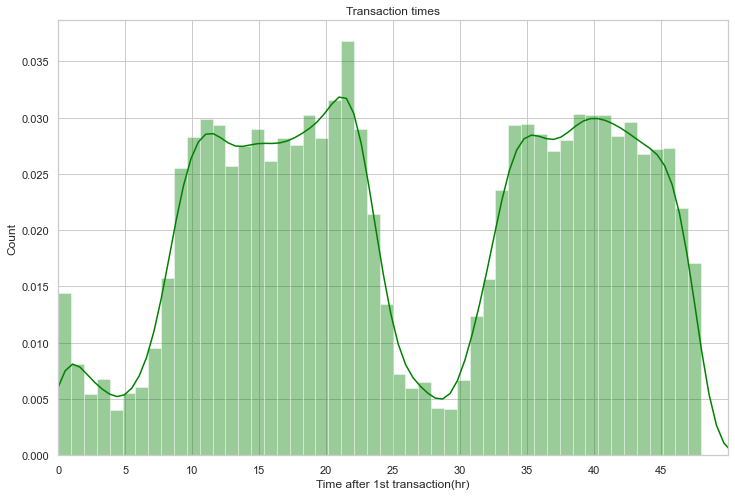

In [16]:
#histogram of transition times. 
plt.figure(figsize=(12,8))
sns.distplot(X_train['Time'],bins=50,color='green')
plt.xlim([0,50])
plt.xticks(np.arange(0,50,5))
plt.xlabel('Time after 1st transaction(hr)')
plt.ylabel('Count')
plt.title('Transaction times')

Thus, it can be observed that there are 2 lulls during the nighttime on each day.

In [17]:
#Summary stats
X_train['Amount'].describe()

count    227845.000000
mean         88.709296
std         250.026305
min           0.000000
25%           5.550000
50%          22.000000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

Looking at the details, it can be observed that the amonunts appear to be right skewed. To verify this, lets construct a histogram.

Text(0.5, 1.0, 'Transaction Amounts')

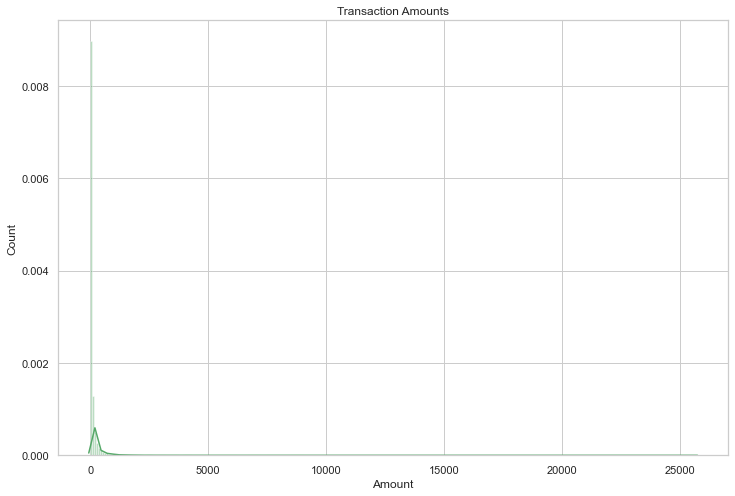

In [18]:
plt.figure(figsize=(12,8))
sns.distplot(X_train['Amount'],bins=300,color='g')
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

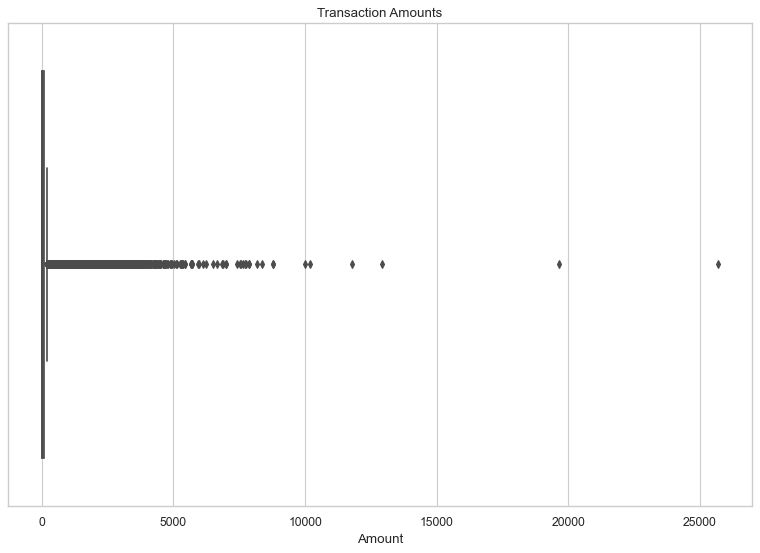

In [19]:
# box plot as the histogram doesnot shoe the details properly.
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

There are no outliers in the left and right side. Thus the amounts were roght skewed. We can check for the skewness to be sure.

In [20]:
X_train['Amount'].skew()

16.910303546516744

Lets remove the skewness and convert the data into a normal distribution.

In [21]:
X_train.loc[:,'Amount'] = X_train['Amount']+ 1e-9
# Shift all amounts by 1e-9

C:\python\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Performing Box-Cox Transform

In [22]:
from scipy import stats
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)


The maximum likelihood estimate of $\lambda$ in the Box-Cox transform:

In [23]:
X_train.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9341,3.766111,1.148607,-0.004154,-0.231106,1.124256,0.696077,1.177523,-0.160142,0.201478,1.568269,...,-0.122816,-0.294334,-0.550620,-0.309693,-1.773489,0.791006,-0.263954,-0.008489,-0.011284,5.423970
210529,38.339444,-0.910538,-0.971254,1.033829,-1.514111,-1.068542,0.148626,-0.660712,0.694582,-0.563151,...,0.362532,0.183422,0.082033,0.245169,-0.347895,-0.046626,-0.366928,-0.130325,-0.161839,7.046293
51525,12.499167,1.222501,0.491904,-0.082522,0.987913,0.164676,-0.845453,0.515114,-0.258261,-0.667442,...,-0.076698,0.068123,0.244725,-0.173798,0.373883,0.849200,-0.317268,-0.007417,0.003691,2.397348
128333,21.853611,1.184303,-0.066290,0.400333,-0.048278,-0.447460,-0.521259,-0.103204,-0.044640,-0.032670,...,0.041195,-0.268415,-0.900138,0.112504,0.032476,0.046804,0.472132,-0.068010,0.008341,4.774875
252025,43.227222,-0.484059,0.439377,-2.033102,-3.398765,2.209264,3.175789,-0.566306,0.423994,-1.281704,...,-0.171988,1.344784,1.271853,0.055813,0.735276,-0.629507,-0.178298,0.394319,0.240147,3.266353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249626,42.917222,-0.312808,1.571520,0.625071,2.851596,1.440896,0.370273,1.559423,-0.122626,-2.127059,...,-0.013666,-0.072840,-0.276301,-0.144144,-0.813403,-0.094574,-0.086966,0.101273,0.154888,5.135193
188363,35.538889,2.313488,-1.066660,-2.698797,-1.810692,0.181929,-0.825158,0.014053,-0.497443,-2.466535,...,-0.303714,0.175502,0.943729,-0.209989,0.371705,0.688140,0.270351,-0.078804,-0.087019,5.277588
224660,39.973056,1.980328,0.104427,-0.923277,1.353652,0.047918,-0.223057,-0.382536,0.034461,0.965143,...,-0.217607,-0.283405,-0.677841,0.263567,-0.961968,-0.298113,-0.888231,0.073120,-0.005631,2.382383
206178,37.805000,1.888991,-0.199603,-0.401767,1.366907,-0.105339,0.441041,-0.401390,0.227025,0.894311,...,-0.254580,-0.469722,-1.120237,0.470175,0.620089,-0.347252,-1.155696,0.049377,-0.033304,2.502845


Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

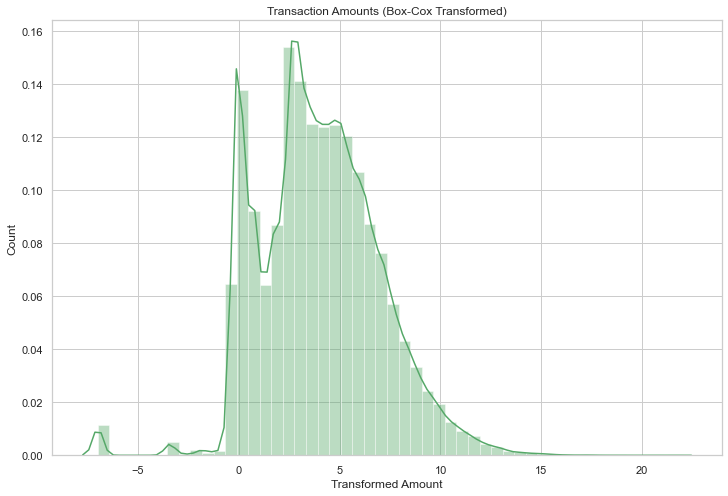

In [24]:
#plotting newly transformed accounts
plt.figure(figsize=(12,8))
sns.distplot(X_train['Amount'],color='g')
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')


In [25]:
X_train['Amount'].describe()

count    227845.000000
mean          3.985515
std           2.972505
min          -6.982733
25%           1.927181
50%           3.831861
75%           5.919328
max          21.680567
Name: Amount, dtype: float64

In [26]:
X_train['Amount'].skew()

0.11421488033443958


So our power transform removed most of the skewness in the Amount variable. Now we need to compute the Box-Cox transform on the test data amounts as well, using the $\lambda$ value estimated on the training data.

In [27]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)


C:\python\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


C:\python\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


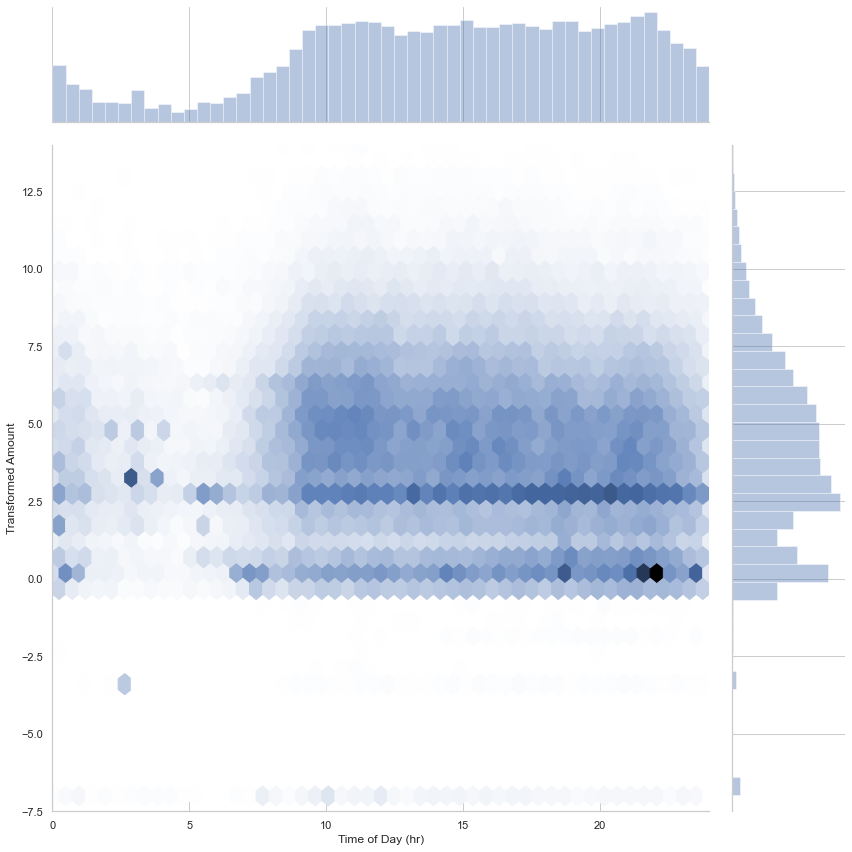

In [28]:
#Time vs Amount
sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex', stat_func=None, size=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')



The transaction amounts appear to be similarly distributed throughout the daytime hours. However, in the earliest hours of the day, around 5-7 AM, amounts around 2.5 are the most common (recall this is a Box-Cox transformed value). Perhaps everyone's buying their morning coffee?

Let's compare the descriptive stats of the PCA variables V1-V28.

In [29]:
pca_vars = ['V%i' % k for k in range(1,29)]

Full Table descriptive stats

In [30]:
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.000713,-0.001034,0.002557,0.003839,-0.002857,0.002085,0.000022,0.000093,0.000243,-0.000363,...,-0.000146,-0.000796,0.000023,0.000897,0.000765,-0.000380,0.000136,-0.000301,-0.000046,-0.000027
std,1.952399,1.636689,1.514288,1.417086,1.383532,1.333769,1.240239,1.200348,1.096453,1.082580,...,0.815140,0.767956,0.733325,0.725353,0.616772,0.605741,0.522184,0.482187,0.405182,0.331048
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-8.696627,-2.534330,-22.565679,-15.430084
25%,-0.922830,-0.599928,-0.887861,-0.844052,-0.693702,-0.766195,-0.555377,-0.208302,-0.642006,-0.535079,...,-0.456946,-0.212129,-0.227952,-0.541079,-0.162242,-0.354208,-0.317488,-0.327576,-0.070767,-0.053013
50%,0.016743,0.064370,0.180865,-0.016750,-0.055388,-0.271706,0.039185,0.022594,-0.051224,-0.091877,...,0.004371,-0.062809,-0.029095,0.007661,-0.011184,0.040977,0.017081,-0.052599,0.001373,0.011255
75%,1.315147,0.801738,1.027592,0.746907,0.611056,0.401204,0.569307,0.328079,0.596563,0.455577,...,0.459695,0.132873,0.186678,0.529342,0.147825,0.438432,0.351400,0.240554,0.091028,0.078341
max,2.451888,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,39.420904,27.202839,10.503090,22.083545,4.584549,7.519589,3.517346,31.612198,33.847808


Text(0.5, 1.0, 'V1-V28 Means')

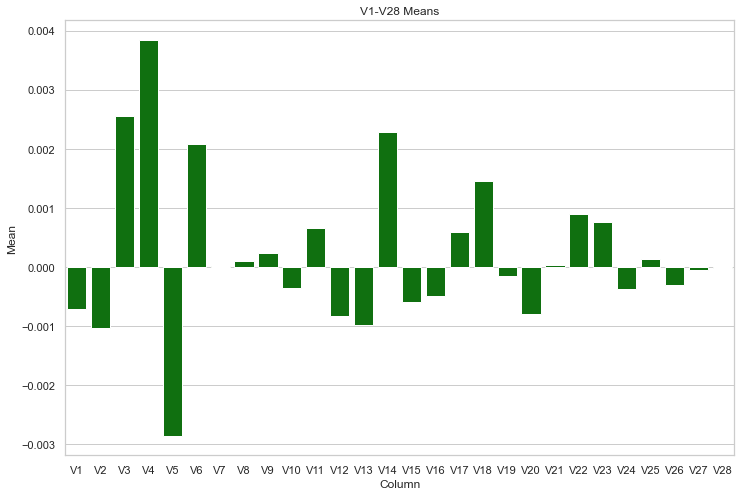

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

All of V1-V28 have approximately zero mean. Now plot the standard deviations:

Text(0.5, 1.0, 'V1-V28 Means')

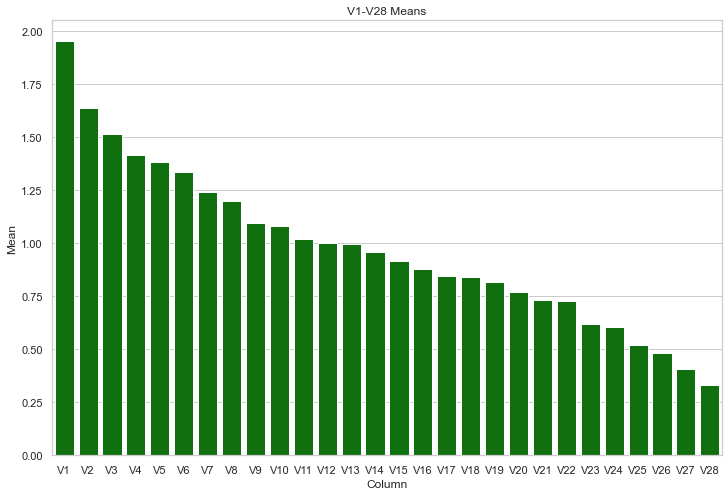

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')


The PCA variables have roughly unit variance, but as low as ~0.3 and as high as ~1.9. Plot the skewnesses next:

Text(0.5, 1.0, 'V1-V28 Means')

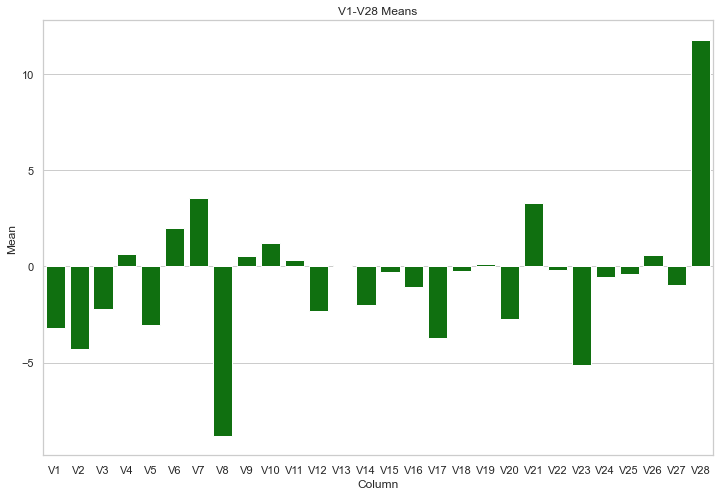

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')


A few of the PCA variables are significantly skewed. Let's plot a histogram of one of the particularly skewed variables, V8, to see the distribution in detail.

Text(0.5, 1.0, 'V8')

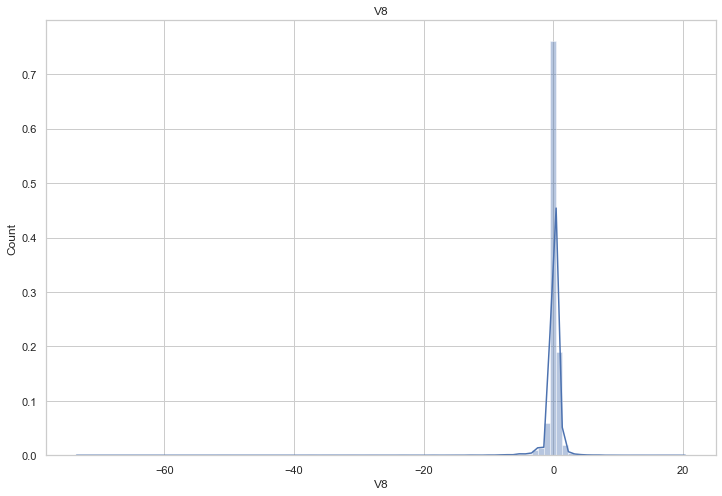

In [34]:
plt.figure(figsize=(12,8))
sns.distplot(X_train['V8'], bins=100)
plt.ylabel('Count')
plt.title('V8')


The histogram doesn't show us outliers. Let's try a boxplot:

Text(0.5, 1.0, 'V8')

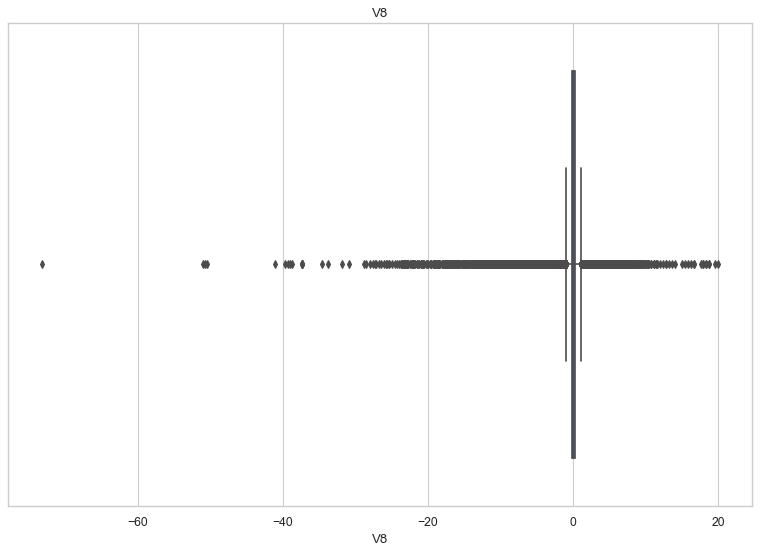

In [35]:
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')


The boxplot is also hard to read due to the large number of outliers, which indicates high kurtosis in V8. This motivates us to plot the kurtoses of the PCA variables. The kurtosis method employed in pandas is Fisher’s definition, for which the standard normal distribution has kurtosis 0.

Note the log scale on the y-axis in the plot below:

Text(0.5, 1.0, 'V1-V28 Kurtoses')

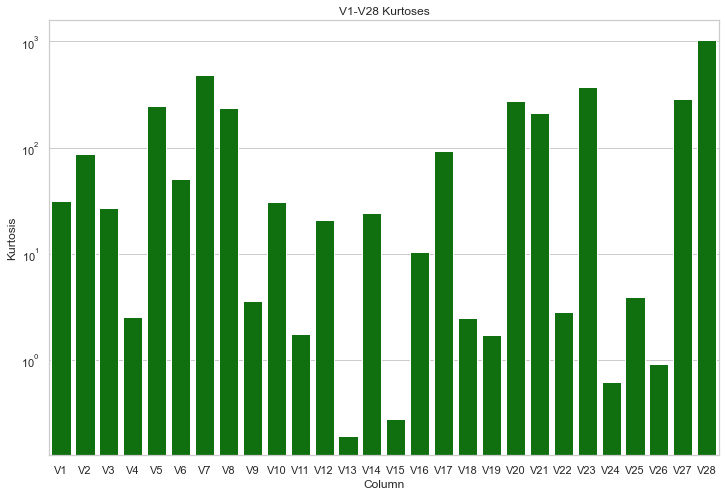

In [36]:
plt.figure(figsize=(12,8))
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='green')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

We've learned that many of the PCA variables are heavy-tailed. The large numbers of outliers in V1-V28 motivates us to consider robust descriptive statistics. Let's plot the medians:

Text(0.5, 1.0, 'V1-V28 Means')

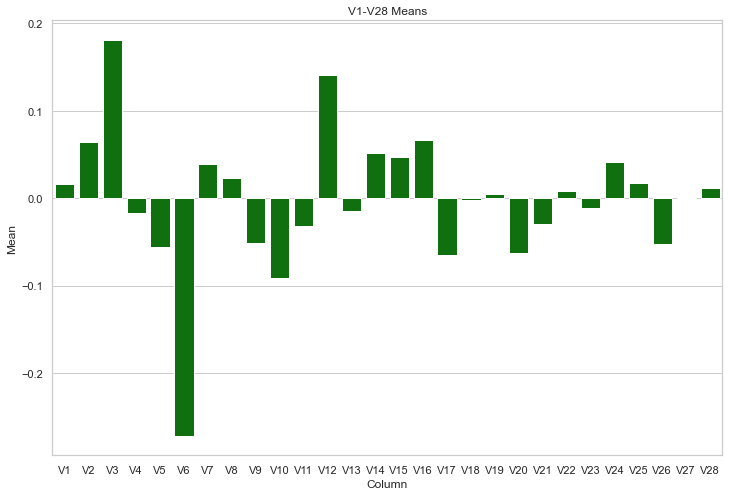

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')


The medians are also roughly zero. Next let's look at the interquartile ranges (IQR)*:

Text(0.5, 1.0, 'V1-V28 IQRs')

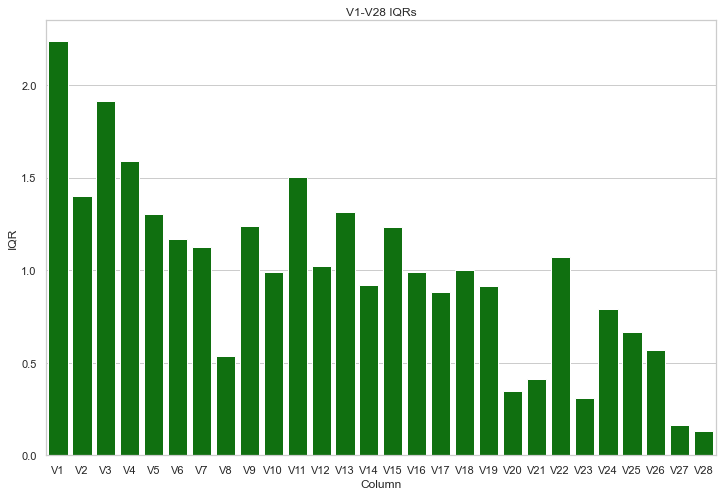

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='green')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

#### Mutual Information between Fraud and the Predictors

Mutual information of 0 indicates no dependence, and higher values indicate higher dependence. According to the sklearn User Guide, "mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation." We have 227,845 training samples, so mutual information should work well. Because the target variable is discrete, we use mutual_info_classif (as opposed to mutual_info_regression for a continuous target).

In [39]:
from sklearn.feature_selection import mutual_info_classif

C:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [40]:
data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1)


In [42]:
mutual_infos = pd.Series(data,index= X_train.columns)

The calculated mutual informations of each variable with Class, in descending order:

In [43]:
mutual_infos.sort_values(ascending=False)

V17       0.008037
V14       0.007977
V10       0.007354
V12       0.007354
V11       0.006607
V16       0.005793
V4        0.004843
V3        0.004755
V18       0.004025
V9        0.003996
V7        0.003941
V2        0.003085
V21       0.002304
V27       0.002271
V6        0.002265
V5        0.002254
V1        0.001990
V8        0.001843
V28       0.001757
Time      0.001722
Amount    0.001422
V19       0.001322
V20       0.001136
V23       0.000827
V24       0.000593
V26       0.000459
V22       0.000388
V25       0.000376
V15       0.000230
V13       0.000205
dtype: float64


The five most correlated variables with Class are, in decreasing order, V17, V14, V10, V12, and V11.

### Logistic Regression

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [63]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

 The type of linear classifier is chosen with the loss hyperparameter. For a linear SVC we set loss = 'hinge', and for logistic regression we set loss = 'log'.

Set the hyperparameter grids to search over, one grid for the linear SVC and one for logistic regression:

In [64]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

The grid search, implemented by GridSearchCV, uses StratifiedKFold with 5 folds for the train/validation splits. We'll use matthews_corrcoef (the Matthews correlation coefficient, MCC) as our scoring metric.

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [66]:

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)


Perform the grid search:

In [67]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.7min finished


Mean cross-validated MCC score of the best estimator found:

In [68]:
grid_sgd.best_score_

0.8054381462050987

This is a pretty good MCC score---random guessing has a score of 0, and a perfect predictor has a score of 1. Now check the best hyperparameters found in the grid search:

In [69]:
grid_sgd.best_params_

{'model__alpha': 233.57214690901213,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}

So the linear SVC performed better than logistic regression, and with a high level of regularization ($\alpha\approx 483$).

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

C:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [71]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])



The random forest takes much longer to train on this fairly large dataset, so we don't actually do a hyperparameter grid search, only specifiying the number of estimators. We'll leave the grid search implemented in case we decide to try different hyperparameter values in the future.

In [72]:
param_grid_rf = {'model__n_estimators': [75]}

In [73]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [74]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [75]:

grid_rf.best_score_

0.8596447282953857

The random forest performed much better than the linear SVC

In [76]:

grid_rf.best_params_

{'model__n_estimators': 75}

### Test Set Evaluation of the Best Model

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [84]:
def classification_eval(estimator,X_test,y_test):
    y_pred=estimator.predict(X_test)
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred),'\n')
    
    print('Classification report')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print("Scalar Metrics")
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

In [85]:
classification_eval(grid_rf, X_test, y_test)

Confusion Matrix
[[56854    10]
 [   15    83]] 

Classification report
              precision    recall  f1-score   support

           0    0.99974   0.99982   0.99978     56864
           1    0.89247   0.84694   0.86911        98

    accuracy                        0.99956     56962
   macro avg    0.94610   0.92338   0.93445     56962
weighted avg    0.99955   0.99956   0.99956     56962

Scalar Metrics
          MCC = 0.86919
        AUPRC = 0.85098
        AUROC = 0.95924
Cohen's kappa = 0.86889
     Accuracy = 0.99956



According to the MCC, the random forest performed better on the test set than on the training set. This is probably due to the refit model being trained on the entire training data set, and not on the smaller CV folds.

## Conclusion

We were able to accurately identify fraudulent credit card transactions using a random forest model. We found that the five variables most correlated with fraud are, in decreasing order, V17, V14, V10, V12, and V11. Only a few preprocessing steps were necessary before constructing predictive models:

1.Split the data using a random, stratified train/test split with a test size of 20%

2.Box-Cox power transform of the transaction amounts to remove skewness in the data

3.Mean and variance standardization of all features as part of a machine learning pipeline

We used the Matthews correlation coefficient (MCC) to compare the performance of different models. In cross validation, the best linear model (logistic regression, linear SVC) achieved a cross-validated MCC score of 0.807, and a random forest achieved a cross-validated MCC score of 0.856. We therefore chose the random forest as the better model, which obtained an MCC of 0.869 on the test set.

To improve a chosen model, we searched over a grid of hyperparameters and compared performance with cross-validation. It may be possible to improve the random forest model by further tweaking the hyperparameters, given additional time and/or computational power.